In [1]:
import numpy as np              # Одномерные и многомерные массивы (array)
import pandas as pd             # Таблицы и временные ряды (dataframe, series)
import matplotlib.pyplot as plt # Научная графика
import seaborn as sns           # Еще больше красивой графики для визуализации данных
import sklearn                  # Алгоритмы машинного обучения

In [2]:
from google.colab import files
uploaded = files.upload()

Saving train.csv to train.csv


In [88]:
import io
data_raw = pd.read_csv(io.BytesIO(uploaded['train.csv']))

 - `PassengerId` – Уникальный идентификатор для каждого пассажира. Каждый идентификатор имеет форму гггг_нн, где гггг - номер группы, а нн - номер пассажира в группе. Люди в группе часто являются членами семьи, но не всегда.
 - `HomePlanet` – Планета, с которой вылетел пассажир.
 - `CryoSleep` – Указывает, решил ли пассажир находиться в состоянии анабиоза на время рейса. Пассажиры, находящиеся в криосне, находятся в своих каютах.
 - `Cabin` – Номер салона, в котором находится пассажир. имеет форму deck/cabin_num/side, где deck - палуба, cabin_num - номер каюты, side - сторона.
 - `Destination` –  Планета, на которую пассажир будет высаживаться.
 - `Age` – Возраст пассажира
 - `VIP` –  Оплатил ли пассажир специальное VIP-обслуживание во время рейса.
 - `RoomService` – Сумма, которую пассажир потратил на обслуживание номера.
 - `FoodCourt` – Сумма, потраченнная пассажиром на фудкорте.
 - `ShoppingMall` – Сумма, потраченная пассажиром в торговом центре.
 - `Spa` – Сумма, потраченная пассажиром в СПА.
 - `VRDeck` – Сумма, потраченная пассажиром на верхней палубе.
 - `Name` – Имя пассажира.
 - `Transported` – Был ли пассажир перенесен в другое измерение. Это цель, столбец, который нужно предсказать.


Цель - предсказать, был ли пассажир перенесен в альтернативное измерение во время столкновения космического корабля "Титаник" с пространственно-временной аномалией.

In [89]:
data_raw.shape

(8693, 14)

In [90]:
data_raw.head(10)

,PassengerId,HomePlanet,CryoSleep,Cabin,Destination,Age,VIP,RoomService,FoodCourt,ShoppingMall,Spa,VRDeck,Name,Transported
0,0001_01,Europa,False,B/0/P,TRAPPIST-1e,39.0,False,0.0,0.0,0.0,0.0,0.0,Maham Ofracculy,False
1,0002_01,Earth,False,F/0/S,TRAPPIST-1e,24.0,False,109.0,9.0,25.0,549.0,44.0,Juanna Vines,True
2,0003_01,Europa,False,A/0/S,TRAPPIST-1e,58.0,True,43.0,3576.0,0.0,6715.0,49.0,Altark Susent,False
3,0003_02,Europa,False,A/0/S,TRAPPIST-1e,33.0,False,0.0,1283.0,371.0,3329.0,193.0,Solam Susent,False
4,0004_01,Earth,False,F/1/S,TRAPPIST-1e,16.0,False,303.0,70.0,151.0,565.0,2.0,Willy Santantines,True
5,0005_01,Earth,False,F/0/P,PSO J318.5-22,44.0,False,0.0,483.0,0.0,291.0,0.0,Sandie Hinetthews,True
6,0006_01,Earth,False,F/2/S,TRAPPIST-1e,26.0,False,42.0,1539.0,3.0,0.0,0.0,Billex Jacostaffey,True
7,0006_02,Earth,True,G/0/S,TRAPPIST-1e,28.0,False,0.0,0.0,0.0,0.0,NaN,Candra Jacostaffey,True
8,0007_01,Earth,False,F/3/S,TRAPPIST-1e,35.0,False,0.0,785.0,17.0,216.0,0.0,Andona Beston,True
9,0008_01,Europa,True,B/1/P,55 Cancri e,14.0,False,0.0,0.0,0.0,0.0,0.0,Erraiam Flatic,True


In [91]:
data_raw['HomePlanet'] = data_raw['HomePlanet'].astype('category')
data_raw['Destination'] = data_raw['Destination'].astype('category')
data_raw['CryoSleep'] = data_raw['CryoSleep'].astype('category')
data_raw['VIP'] = data_raw['VIP'].astype('category')
data_raw['Transported']=data_raw['Transported'].astype(int)

In [92]:
data_raw[["Deck", "Cabin_num", "Side"]] = data_raw["Cabin"].str.split("/", expand=True)
data_raw=data_raw.drop('Cabin',axis =1)

In [93]:
data_raw[["Group", "num"]] = data_raw["PassengerId"].str.split("_", expand=True)
data_raw=data_raw.drop('PassengerId',axis=1)

In [94]:
data_raw['Cabin_num'] = data_raw['Cabin_num'].astype(float)
data_raw['Group'] = data_raw['Group'].astype(int)
data_raw['num'] = data_raw['num'].astype(int)
data_raw['Side'] = data_raw['Side'].astype('category')
data_raw['Deck'] = data_raw['Deck'].astype('category')

In [95]:
data_raw.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 8693 entries, 0 to 8692
Data columns (total 17 columns):
 #   Column        Non-Null Count  Dtype   
---  ------        --------------  -----   
 0   HomePlanet    8492 non-null   category
 1   CryoSleep     8476 non-null   category
 2   Destination   8511 non-null   category
 3   Age           8514 non-null   float64 
 4   VIP           8490 non-null   category
 5   RoomService   8512 non-null   float64 
 6   FoodCourt     8510 non-null   float64 
 7   ShoppingMall  8485 non-null   float64 
 8   Spa           8510 non-null   float64 
 9   VRDeck        8505 non-null   float64 
 10  Name          8493 non-null   object  
 11  Transported   8693 non-null   int64   
 12  Deck          8494 non-null   category
 13  Cabin_num     8494 non-null   float64 
 14  Side          8494 non-null   category
 15  Group         8693 non-null   int64   
 16  num           8693 non-null   int64   
dtypes: category(6), float64(7), int64(3), object(1)
memo

In [96]:
data_raw.describe(include='all')

,HomePlanet,CryoSleep,Destination,Age,VIP,RoomService,FoodCourt,ShoppingMall,Spa,VRDeck,Name,Transported,Deck,Cabin_num,Side,Group,num
count,8492,8476,8511,8514.000000,8490,8512.000000,8510.000000,8485.000000,8510.000000,8505.000000,8493,8693.000000,8494,8494.000000,8494,8693.000000,8693.000000
unique,3,2,3,NaN,2,NaN,NaN,NaN,NaN,NaN,8473,NaN,8,NaN,2,NaN,NaN
top,Earth,False,TRAPPIST-1e,NaN,False,NaN,NaN,NaN,NaN,NaN,Gollux Reedall,NaN,F,NaN,S,NaN,NaN
freq,4602,5439,5915,NaN,8291,NaN,NaN,NaN,NaN,NaN,2,NaN,2794,NaN,4288,NaN,NaN
mean,NaN,NaN,NaN,28.827930,NaN,224.687617,458.077203,173.729169,311.138778,304.854791,NaN,0.503624,NaN,600.367671,NaN,4633.389624,1.517773
std,NaN,NaN,NaN,14.489021,NaN,666.717663,1611.489240,604.696458,1136.705535,1145.717189,NaN,0.500016,NaN,511.867226,NaN,2671.028856,1.054241
min,NaN,NaN,NaN,0.000000,NaN,0.000000,0.000000,0.000000,0.000000,0.000000,NaN,0.000000,NaN,0.000000,NaN,1.000000,1.000000
25%,NaN,NaN,NaN,19.000000,NaN,0.000000,0.000000,0.000000,0.000000,0.000000,NaN,0.000000,NaN,167.250000,NaN,2319.000000,1.000000
50%,NaN,NaN,NaN,27.000000,NaN,0.000000,0.000000,0.000000,0.000000,0.000000,NaN,1.000000,NaN,427.000000,NaN,4630.000000,1.000000
75%,NaN,NaN,NaN,38.000000,NaN,47.000000,76.000000,27.000000,59.000000,46.000000,NaN,1.000000,NaN,999.000000,NaN,6883.000000,2.000000


In [97]:
rows_to_drop = data_raw[
    (data_raw['FoodCourt'] < data_raw['FoodCourt'].quantile(0.005)) | (data_raw['FoodCourt'] > data_raw['FoodCourt'].quantile(0.995)) |
    (data_raw['Spa']  < data_raw['Spa' ].quantile(0.005)) | (data_raw['Spa']  > data_raw['Spa' ].quantile(0.995)) |
    (data_raw['RoomService']  < data_raw['RoomService' ].quantile(0.005)) | (data_raw['RoomService']  > data_raw['RoomService' ].quantile(0.995)) |
    (data_raw['VRDeck']  < data_raw['VRDeck' ].quantile(0.005)) | (data_raw['VRDeck']  > data_raw['VRDeck' ].quantile(0.995)) |
    (data_raw['ShoppingMall']  < data_raw['ShoppingMall' ].quantile(0.005)) | (data_raw['ShoppingMall']  > data_raw['ShoppingMall' ].quantile(0.995))].index
data = data_raw.drop(rows_to_drop)
data.shape

(8485, 17)

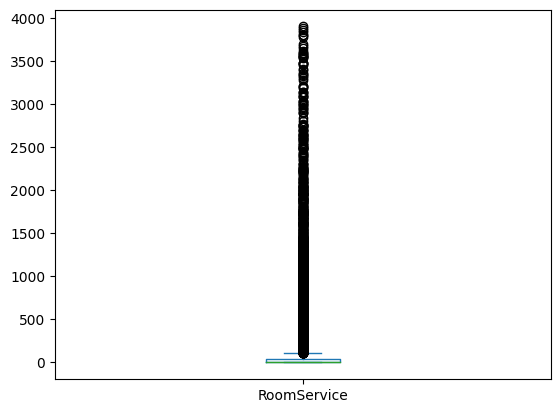

In [98]:
data['RoomService'].plot(kind='box')
pass

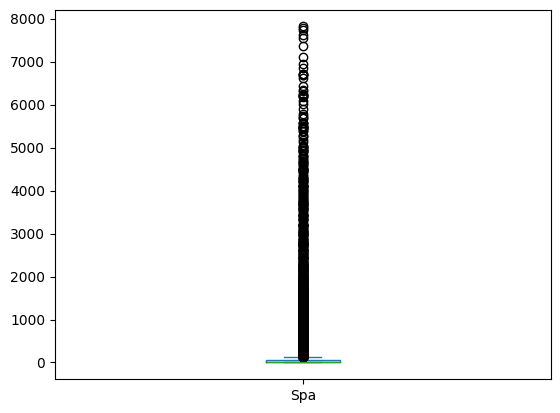

In [99]:
data['Spa'].plot(kind='box')
pass

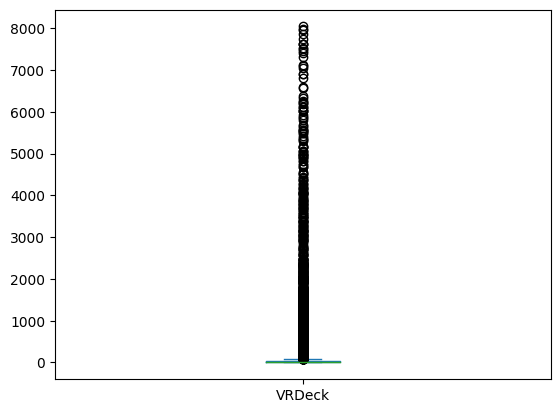

In [100]:
data['VRDeck'].plot(kind='box')
pass

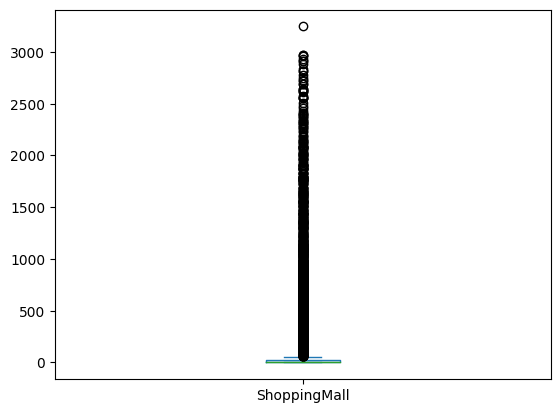

In [101]:
data['ShoppingMall'].plot(kind='box')
pass

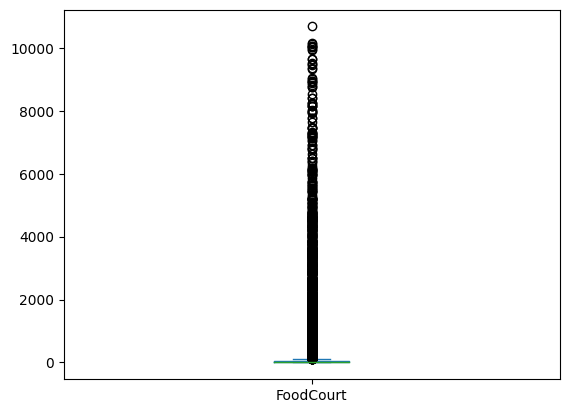

In [102]:
data['FoodCourt'].plot(kind='box')
pass

In [103]:
data.describe(include='all')

,HomePlanet,CryoSleep,Destination,Age,VIP,RoomService,FoodCourt,ShoppingMall,Spa,VRDeck,Name,Transported,Deck,Cabin_num,Side,Group,num
count,8287,8271,8304,8308.000000,8288,8309.000000,8307.000000,8281.000000,8305.000000,8297.000000,8290,8485.000000,8295,8295.000000,8295,8485.000000,8485.000000
unique,3,2,3,NaN,2,NaN,NaN,NaN,NaN,NaN,8270,NaN,8,NaN,2,NaN,NaN
top,Earth,False,TRAPPIST-1e,NaN,False,NaN,NaN,NaN,NaN,NaN,Juane Popelazquez,NaN,F,NaN,S,NaN,NaN
freq,4594,5234,5804,NaN,8107,NaN,NaN,NaN,NaN,NaN,2,NaN,2773,NaN,4189,NaN,NaN
mean,NaN,NaN,NaN,28.681993,NaN,195.155975,358.038161,145.055307,244.466586,237.255996,NaN,0.507955,NaN,608.409042,NaN,4634.881084,1.514555
std,NaN,NaN,NaN,14.508827,NaN,499.622135,1108.079042,381.259797,764.793855,766.889458,NaN,0.499966,NaN,512.492755,NaN,2669.825388,1.053353
min,NaN,NaN,NaN,0.000000,NaN,0.000000,0.000000,0.000000,0.000000,0.000000,NaN,0.000000,NaN,0.000000,NaN,1.000000,1.000000
25%,NaN,NaN,NaN,19.000000,NaN,0.000000,0.000000,0.000000,0.000000,0.000000,NaN,0.000000,NaN,173.000000,NaN,2333.000000,1.000000
50%,NaN,NaN,NaN,27.000000,NaN,0.000000,0.000000,0.000000,0.000000,0.000000,NaN,1.000000,NaN,442.000000,NaN,4625.000000,1.000000
75%,NaN,NaN,NaN,38.000000,NaN,43.000000,49.500000,23.000000,47.000000,34.000000,NaN,1.000000,NaN,1009.500000,NaN,6885.000000,2.000000


In [104]:
pd.plotting.scatter_matrix(data, figsize = (10, 8))
pass

In [105]:
corr_mat = data.corr(numeric_only=True)

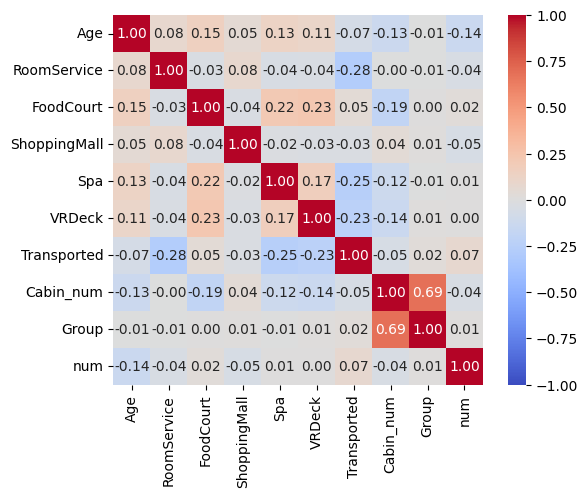

In [106]:
sns.heatmap(corr_mat, square=True, annot=True, fmt='.2f', vmin=-1, vmax=1, cmap='coolwarm')
pass

In [108]:
categorical_columns = [c for c in data.columns if data[c].dtype.name == 'category']
numerical_columns   = [c for c in data.columns if data[c].dtype.name != 'category']
print(categorical_columns)
print(numerical_columns)

['HomePlanet', 'CryoSleep', 'Destination', 'VIP', 'Deck', 'Side']
['Age', 'RoomService', 'FoodCourt', 'ShoppingMall', 'Spa', 'VRDeck', 'Name', 'Transported', 'Cabin_num', 'Group', 'num']


In [109]:
data.median(axis = 0)

<ipython-input-109-6aeb7e95d864>:1: FutureWarning: The default value of numeric_only in DataFrame.median is deprecated. In a future version, it will default to False. In addition, specifying 'numeric_only=None' is deprecated. Select only valid columns or specify the value of numeric_only to silence this warning.
  data.median(axis = 0)


Age               27.0
RoomService        0.0
FoodCourt          0.0
ShoppingMall       0.0
Spa                0.0
VRDeck             0.0
Transported        1.0
Cabin_num        442.0
Group           4625.0
num                1.0
dtype: float64

In [110]:
data.isna().sum()

HomePlanet      198
CryoSleep       214
Destination     181
Age             177
VIP             197
RoomService     176
FoodCourt       178
ShoppingMall    204
Spa             180
VRDeck          188
Name            195
Transported       0
Deck            190
Cabin_num       190
Side            190
Group             0
num               0
dtype: int64

In [111]:
data = data.fillna(data.median(axis = 0), axis = 0)

<ipython-input-111-63d340763a3f>:1: FutureWarning: The default value of numeric_only in DataFrame.median is deprecated. In a future version, it will default to False. In addition, specifying 'numeric_only=None' is deprecated. Select only valid columns or specify the value of numeric_only to silence this warning.
  data = data.fillna(data.median(axis = 0), axis = 0)


In [112]:
data_describe = data.describe(include = 'category')
for c in categorical_columns:
    data[c] = data[c].fillna(data_describe[c]['top'])

In [113]:
data.isna().sum()

HomePlanet        0
CryoSleep         0
Destination       0
Age               0
VIP               0
RoomService       0
FoodCourt         0
ShoppingMall      0
Spa               0
VRDeck            0
Name            195
Transported       0
Deck              0
Cabin_num         0
Side              0
Group             0
num               0
dtype: int64

In [114]:
from sklearn.preprocessing import OneHotEncoder
enc = OneHotEncoder(drop='if_binary', sparse=False)
enc.fit(data[categorical_columns])

/usr/local/lib/python3.10/dist-packages/sklearn/preprocessing/_encoders.py:868: FutureWarning: `sparse` was renamed to `sparse_output` in version 1.2 and will be removed in 1.4. `sparse_output` is ignored unless you leave `sparse` to its default value.
  warnings.warn(


OneHotEncoder(drop='if_binary', sparse=False, sparse_output=False)

In [115]:
dummies = pd.DataFrame(enc.transform(data[categorical_columns]),
                       columns=enc.get_feature_names_out(), index=data.index)
dummies.head()

,HomePlanet_Earth,HomePlanet_Europa,HomePlanet_Mars,CryoSleep_1.0,Destination_55 Cancri e,Destination_PSO J318.5-22,Destination_TRAPPIST-1e,VIP_1.0,Deck_A,Deck_B,Deck_C,Deck_D,Deck_E,Deck_F,Deck_G,Deck_T,Side_S
0,0.0,1.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
1,1.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,1.0
2,0.0,1.0,0.0,0.0,0.0,0.0,1.0,1.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0
3,0.0,1.0,0.0,0.0,0.0,0.0,1.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0
4,1.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,1.0


In [116]:
data = pd.concat((data, dummies), axis=1).drop(categorical_columns, axis=1)

In [117]:
data.head()

,Age,RoomService,FoodCourt,ShoppingMall,Spa,VRDeck,Name,Transported,Cabin_num,Group,...,VIP_1.0,Deck_A,Deck_B,Deck_C,Deck_D,Deck_E,Deck_F,Deck_G,Deck_T,Side_S
0,39.0,0.0,0.0,0.0,0.0,0.0,Maham Ofracculy,0,0.0,1,...,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
1,24.0,109.0,9.0,25.0,549.0,44.0,Juanna Vines,1,0.0,2,...,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,1.0
2,58.0,43.0,3576.0,0.0,6715.0,49.0,Altark Susent,0,0.0,3,...,1.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0
3,33.0,0.0,1283.0,371.0,3329.0,193.0,Solam Susent,0,0.0,3,...,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0
4,16.0,303.0,70.0,151.0,565.0,2.0,Willy Santantines,1,1.0,4,...,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,1.0


In [118]:
corr_mat = data.corr(numeric_only=True)

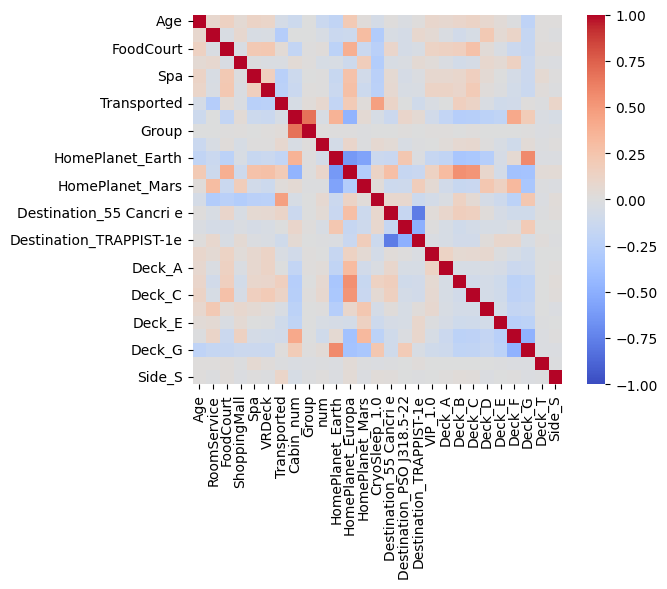

In [119]:
sns.heatmap(corr_mat, square=True,  vmin=-1, vmax=1, cmap='coolwarm')
pass

Исключим признаки Spa, VIP, Name и num.



In [120]:
data = data.drop('num', axis = 1)\
            .drop('Name', axis = 1)\
            .drop('VIP_1.0', axis = 1)

In [121]:
X = data.drop(['Transported'], axis=1)
y = data['Transported']

In [122]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.25, random_state = 42)

N_train, _ = X_train.shape
N_test,  _ = X_test.shape

N_train, N_test

(6363, 2122)

In [123]:
from sklearn.preprocessing import StandardScaler
scaler = StandardScaler()
scaler.fit(X_train)
X_train = pd.DataFrame(scaler.transform(X_train), columns=X_train.columns, index=X_train.index)
X_test = pd.DataFrame(scaler.transform(X_test),
                      columns=X_test.columns, index=X_test.index)

In [124]:
X_train.describe()

,Age,RoomService,FoodCourt,ShoppingMall,Spa,VRDeck,Cabin_num,Group,HomePlanet_Earth,HomePlanet_Europa,...,Destination_TRAPPIST-1e,Deck_A,Deck_B,Deck_C,Deck_D,Deck_E,Deck_F,Deck_G,Deck_T,Side_S
count,6.363000e+03,6.363000e+03,6.363000e+03,6.363000e+03,6.363000e+03,6.363000e+03,6363.000000,6.363000e+03,6.363000e+03,6.363000e+03,...,6.363000e+03,6.363000e+03,6.363000e+03,6.363000e+03,6.363000e+03,6.363000e+03,6.363000e+03,6.363000e+03,6.363000e+03,6.363000e+03
mean,1.083178e-16,3.964210e-17,-4.745885e-17,-1.116679e-18,-1.005011e-17,6.700073e-18,0.000000,1.055261e-16,-3.015033e-17,6.085900e-17,...,1.312098e-17,-3.908376e-17,7.090911e-17,1.340015e-17,-8.598427e-17,-2.177524e-17,-1.730852e-17,6.476737e-17,1.675018e-18,7.816752e-18
std,1.000079e+00,1.000079e+00,1.000079e+00,1.000079e+00,1.000079e+00,1.000079e+00,1.000079,1.000079e+00,1.000079e+00,1.000079e+00,...,1.000079e+00,1.000079e+00,1.000079e+00,1.000079e+00,1.000079e+00,1.000079e+00,1.000079e+00,1.000079e+00,1.000079e+00,1.000079e+00
min,-1.995518e+00,-3.857458e-01,-3.280894e-01,-3.708389e-01,-3.187542e-01,-3.079650e-01,-1.195134,-1.751042e+00,-1.140730e+00,-5.515077e-01,...,-1.558313e+00,-1.671775e-01,-3.112553e-01,-2.942412e-01,-2.375927e-01,-3.346995e-01,-7.337867e-01,-6.544332e-01,-2.804302e-02,-1.037640e+00
25%,-6.050495e-01,-3.857458e-01,-3.280894e-01,-3.708389e-01,-3.187542e-01,-3.079650e-01,-0.847109,-8.583913e-01,-1.140730e+00,-5.515077e-01,...,-1.558313e+00,-1.671775e-01,-3.112553e-01,-2.942412e-01,-2.375927e-01,-3.346995e-01,-7.337867e-01,-6.544332e-01,-2.804302e-02,-1.037640e+00
50%,-1.183854e-01,-3.857458e-01,-3.280894e-01,-3.708389e-01,-3.187542e-01,-3.079650e-01,-0.326054,-3.757334e-03,8.766313e-01,-5.515077e-01,...,6.417195e-01,-1.671775e-01,-3.112553e-01,-2.942412e-01,-2.375927e-01,-3.346995e-01,-7.337867e-01,-6.544332e-01,-2.804302e-02,9.637252e-01
75%,5.768490e-01,-3.069517e-01,-2.840540e-01,-3.256408e-01,-2.598569e-01,-2.659917e-01,0.777008,8.422192e-01,8.766313e-01,-5.515077e-01,...,6.417195e-01,-1.671775e-01,-3.112553e-01,-2.942412e-01,-2.375927e-01,-3.346995e-01,1.362794e+00,1.528040e+00,-2.804302e-02,9.637252e-01
max,3.496833e+00,7.403894e+00,9.468877e+00,8.259344e+00,9.913667e+00,1.007559e+01,2.528930,1.741269e+00,8.766313e-01,1.813211e+00,...,6.417195e-01,5.981668e+00,3.212797e+00,3.398573e+00,4.208884e+00,2.987755e+00,1.362794e+00,1.528040e+00,3.565950e+01,9.637252e-01


In [125]:
from sklearn.neighbors import KNeighborsClassifier

model = KNeighborsClassifier(n_neighbors = 5)
model.fit(X_train, y_train)

KNeighborsClassifier()

In [126]:
y_train_predict = model.predict(X_train)
y_test_predict = model.predict(X_test)

In [127]:
model.score(X_train, y_train), model.score(X_test, y_test)

(0.8499135627848499, 0.7761545711592837)

In [128]:
1 - model.score(X_train, y_train), 1 - model.score(X_test, y_test)

(0.15008643721515014, 0.22384542884071634)

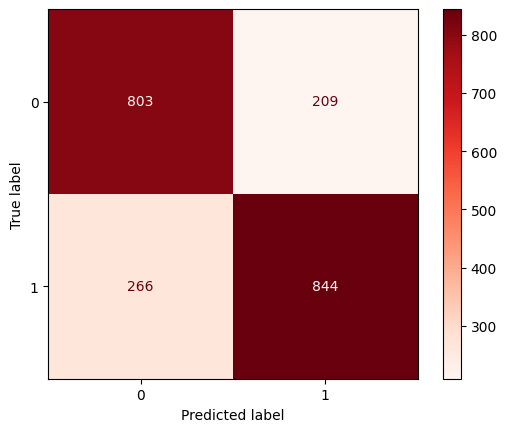

In [129]:
from sklearn.metrics import ConfusionMatrixDisplay
from sklearn.metrics import confusion_matrix
ConfusionMatrixDisplay(confusion_matrix(y_test, y_test_predict)).plot(cmap = 'Reds')
pass

In [138]:
from sklearn.model_selection import GridSearchCV
nnb = [1, 3, 5, 10, 15, 20, 25, 35, 45, 55]
knn = KNeighborsClassifier()
grid = GridSearchCV(knn, param_grid = {'n_neighbors': nnb})
grid.fit(X_train, y_train)

best_cv_err = 1 - grid.best_score_
best_n_neighbors = grid.best_estimator_.n_neighbors
print(best_cv_err, best_n_neighbors)

0.22285086484163108 10


Оптимальое значение гиперпараметра для метода Ближайших Соседей составило 10. Ошибка на тестовой выборке при этом составила 0.22285086484163108.

Так же попробуем использовать метод Градиентного Бустинга, так как онн считается одним из наиболее мощныз и эффективных алгоритмов.

In [139]:
from sklearn import ensemble
gbt = ensemble.GradientBoostingClassifier(n_estimators = 1000)
gbt.fit(X_train, y_train)

err_train = np.mean(y_train != gbt.predict(X_train))
err_test = np.mean(y_test != gbt.predict(X_test))

print(err_train, err_test)

0.07150715071507151 0.19698397737983034


Ошибка составила 0.19698397737983034 при n_estimators = 1000, что лучше, чем при методе Ближайших Соседей.